In [ ]:
# !pip install kaggle
# ! mkdir ~/.kaggle

# import json
# kaggle_token = {"username":"datastorm120","key":"8ff6645b2258b372547db6ef8b635c6c"}
# with open("kaggle.json", "w") as f:
#   token_json = json.dumps(kaggle_token)
#   f.write(token_json)

# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# ! kaggle competitions download -c data-storm-4
# ! unzip data-storm-4.zip 

In [ ]:
import pandas as pd
import numpy as np

store_info_data = pd.read_csv('Store-info.csv')
historical_data = pd.read_csv('Historical-transaction-data.csv')
testing_data = pd.read_csv('Testing-data.csv')

store_info_data.head()

,shop_id,shop_area_sq_ft,shop_profile
0,SHOP047,528,Moderate
1,SHOP009,676,High
2,SHOP083,676,Low
3,SHOP117,676,Low
4,SHOP042,676,Low


In [ ]:
merged_df = pd.merge(historical_data, store_info_data, on='shop_id', how='left')

merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,678,Moderate
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,668,Moderate
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,678,Moderate
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,678,Moderate
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,668,Moderate


In [ ]:
count = (merged_df['shop_profile'] == 'High').sum()
print(count)

144956


In [ ]:
null_count = merged_df['item_description'].isnull().sum()
print("Number of null values in item_description feature:", null_count)

Number of null values in item_description feature: 35928


In [ ]:
count = (merged_df['shop_profile'] == 'High').sum()
print(count)

144956


In [ ]:
# create a dictionary mapping item prices to their most common item descriptions
price_to_mode = merged_df.groupby('item_description')['item_price'].apply(lambda x: x.mode()[0]).to_dict()
# Loop through each row in merged_df
for index, row in merged_df.iterrows():
    # Check if item_description is null
    if pd.isnull(row['item_description']):
        # Find the item name in price_to_mode that has the same price
        item_name = [key for key, value in price_to_mode.items() if value == row['item_price']]
        # If there is a matching item name, fill the null value in item_description
        if item_name:
            merged_df.at[index, 'item_description'] = item_name[0]

null_count = merged_df['item_description'].isnull().sum()
print("Number of null values in item_description feature:", null_count)

Number of null values in item_description feature: 15503


In [319]:
count = (merged_df['shop_profile'] == 'High').sum()
print(count)

144956


In [320]:
merged_df['item_price'] = merged_df.apply(lambda row: price_to_mode[row['item_description']] if pd.isnull(row['item_price']) else row['item_price'], axis=1)

null_count = merged_df['item_price'].isnull().sum()
print("Number of null values in item_price feature:", null_count)

Number of null values in item_price feature: 0


In [321]:
count = (merged_df['shop_profile'] == 'High').sum()
print(count)

144956


In [322]:
merged_df.dropna(subset=['item_description'], inplace=True)

null_count = merged_df['item_description'].isnull().sum()
print("Number of null values in item_description feature:", null_count)

Number of null values in item_description feature: 0


In [323]:
count = (merged_df['shop_profile'] == 'High').sum()
print(count)

140782


In [324]:
merged_df.dropna(subset=['invoice_id'], inplace=True)

null_count = merged_df['invoice_id'].isnull().sum()
print("Number of null values in invoice_id feature:", null_count)

Number of null values in invoice_id feature: 0


In [325]:
count = (merged_df['shop_profile'] == 'High').sum()
print(count)

138647


In [326]:
# Select columns with numeric data types
numeric_cols = merged_df.select_dtypes(include=[int, float])

# Drop rows with negative values in any numeric column
merged_df = merged_df.drop(numeric_cols[(numeric_cols < 0).any(1)].index)

<ipython-input-326-e7cf8abd89dd>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  merged_df = merged_df.drop(numeric_cols[(numeric_cols < 0).any(1)].index)


In [327]:
count = (merged_df['shop_profile'] == 'High').sum()
print(count)

138645


In [328]:
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,ORANGE BARLEY 1.5L,2021-12-11T00:00:00.000Z,147.0,BGXA,SHOP008,220,2,678,Moderate
1,GINGER BEER 1.5L,2021-10-17T00:00:00.000Z,371.0,IA25,SHOP112,220,2,668,Moderate
2,TONIC PET 500ML,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,160,2,678,Moderate
3,CREAM SODA 1L,2021-12-13T00:00:00.000Z,484.0,VN7V,SHOP008,150,2,678,Moderate
4,STRAWBERRY MILK 180ML,2021-10-23T00:00:00.000Z,1310.0,7S00,SHOP112,210,5,668,Moderate


In [329]:
print(len(merged_df))

452417


In [330]:
count = (merged_df['shop_profile'] == 'High').sum()
print(count)

138645


In [331]:
from sklearn.preprocessing import LabelEncoder

# instantiate a LabelEncoder object
le = LabelEncoder()

# label encode the item_description, customer_id, and shop_profile columns
merged_df['item_description'] = le.fit_transform(merged_df['item_description'])
merged_df['customer_id'] = le.fit_transform(merged_df['customer_id'])

# replace the values in the shop_profile column with 1 for High, 2 for Moderate, and 3 for Low
merged_df['shop_profile'] = merged_df['shop_profile'].replace({'Low':3, 'Moderate':2, 'High':1})

merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile
0,27,2021-12-11T00:00:00.000Z,147.0,59378,SHOP008,220,2,678,2.0
1,14,2021-10-17T00:00:00.000Z,371.0,94694,SHOP112,220,2,668,2.0
2,35,2021-12-13T00:00:00.000Z,484.0,163963,SHOP008,160,2,678,2.0
3,4,2021-12-13T00:00:00.000Z,484.0,163963,SHOP008,150,2,678,2.0
4,34,2021-10-23T00:00:00.000Z,1310.0,40280,SHOP112,210,5,668,2.0


In [332]:
# extract the month from the transaction_date column and replace its value with the month
merged_df['transaction_month'] = pd.to_datetime(merged_df['transaction_date']).dt.month

# display the updated dataframe
merged_df.head()

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,transaction_month
0,27,2021-12-11T00:00:00.000Z,147.0,59378,SHOP008,220,2,678,2.0,12
1,14,2021-10-17T00:00:00.000Z,371.0,94694,SHOP112,220,2,668,2.0,10
2,35,2021-12-13T00:00:00.000Z,484.0,163963,SHOP008,160,2,678,2.0,12
3,4,2021-12-13T00:00:00.000Z,484.0,163963,SHOP008,150,2,678,2.0,12
4,34,2021-10-23T00:00:00.000Z,1310.0,40280,SHOP112,210,5,668,2.0,10


In [333]:
merged_df = merged_df.drop("transaction_date",axis=1)

merged_df.head()

,item_description,invoice_id,customer_id,shop_id,item_price,quantity_sold,shop_area_sq_ft,shop_profile,transaction_month
0,27,147.0,59378,SHOP008,220,2,678,2.0,12
1,14,371.0,94694,SHOP112,220,2,668,2.0,10
2,35,484.0,163963,SHOP008,160,2,678,2.0,12
3,4,484.0,163963,SHOP008,150,2,678,2.0,12
4,34,1310.0,40280,SHOP112,210,5,668,2.0,10


In [334]:
num_null_shop_profile = merged_df['shop_profile'].isnull().sum()

# print the number of records that have NaN as the value for the shop_profile column
print(f"There are {num_null_shop_profile} records with NaN as the value for shop_profile column.")

There are 83036 records with NaN as the value for shop_profile column.


In [335]:
x = merged_df[['item_description','invoice_id']]
x.head()

,item_description,invoice_id
0,27,147.0
1,14,371.0
2,35,484.0
3,4,484.0
4,34,1310.0


In [344]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Select the features and predictor variable
features = ['item_description','quantity_sold', 'shop_area_sq_ft']
target = 'shop_profile'

# Drop rows with NaN values
merged = merged_df.dropna(subset=[target])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(merged[features], merged[target], test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get accuracy and f1 score on test data
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Test accuracy: {accuracy:.4f}')
print(f'Test f1 score: {f1:.4f}')

# Predict the shop_profile for rows with NaN values
# missing_df = merged_df[merged_df[target].isna()]
# missing_df[target] = model.predict(missing_df[features])

# # Save the predicted shop_profile values
# missing_df.head()

Test accuracy: 0.4179
Test f1 score: 0.4026


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


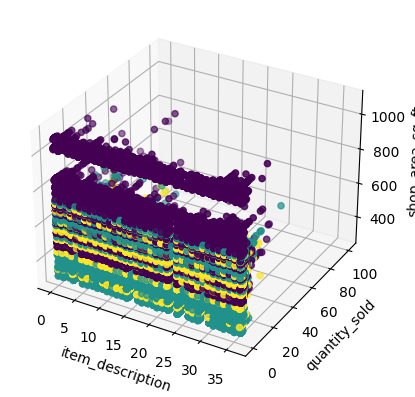

In [345]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = merged_df[features[0]]
y = merged_df[features[1]]
z = merged_df[features[2]]

ax.scatter(x, y, z, c=merged_df['shop_profile'], cmap='viridis')

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])

plt.show()

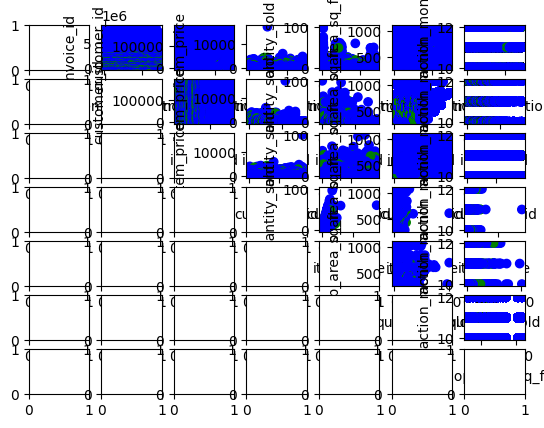

In [ ]:
import matplotlib.pyplot as plt
from itertools import combinations

fig, axs = plt.subplots(len(features), len(features))

colors = {1.0: 'red', 2.0: 'blue', 3.0: 'green'}
merged_df = merged_df.dropna(subset=[target])
for i, j in combinations(range(len(features)), 2):
    x = merged_df[features[i]]
    y = merged_df[features[j]]
    c = merged_df['shop_profile'].apply(lambda x: colors[x])
    axs[i, j].scatter(x, y, c=c)
    axs[i, j].set_xlabel(features[i])
    axs[i, j].set_ylabel(features[j])

plt.show()

In [ ]:
count = (merged_df['shop_profile'] == 1.0).sum()
print(count)

0
